# Linear regression
Generate a set of points around a line y = ax + b

(a) Choose a = 2 and b = 3

(b) Select the range for x as [−10, 10] and generate n = 100 values for x
in that interval.

(c) Compute the values of y for each x as yi = 2xi + 3.

(d) Plot the line y = 2x + 3 in black color.

(e) Generate a set of n points around the line using the equation
yi = 2xi + 3 + σN (0, 1) (1)

where σ is the standard deviation and N (0, 1) is the zero-mean unity variance normal distribution

(f) Show the scatter plot of these noisy points (in red color) on the same
graph generated in step (d).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
a=2
b=3
sigma=0.5
X=np.linspace(-10,10,100)
Y_actual=a*X+b
Y_noisy=a*X+b+sigma*np.random.normal(0,1, 100)

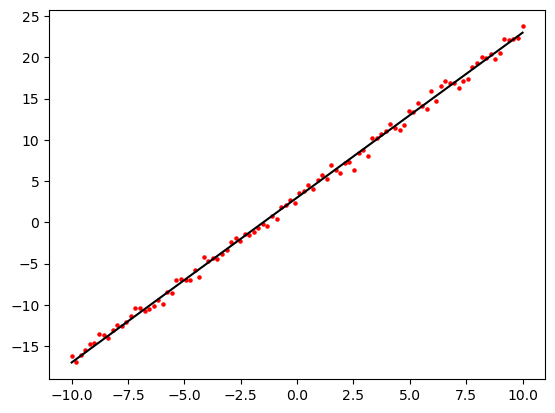

In [2]:
plt.plot(X, Y_actual, c='k')
plt.scatter(X,Y_noisy, c='r', s=5)
plt.show()

## Pesudo inverse
Pseudo-inverse:

  The pseudo-inverse method is a direct analytical approach for finding the solution to a linear regression problem. It involves calculating the Moore-Penrose pseudo-inverse of the matrix representing the independent variables. The pseudo-inverse allows us to find the coefficients that minimize the sum of squared differences between the predicted values and the actual values of the dependent variable.
Advantages of the pseudo-inverse method:

* Provides an exact solution.
* Particularly useful when the number of independent variables is small.

Limitations of the pseudo-inverse method:

* It can be computationally expensive for large datasets.
* The pseudo-inverse may not exist or be numerically unstable when the matrix is not full-rank or ill-conditioned.

Method:

$Y=AX$ , where X is a non square matirx
We can find the solution using pseudo inverse as follows

$\hat X= (X^{T}X)^{-1}X^{T}$

$A=\hat X Y$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
a=2
b=3
sigma=0.5
X=np.linspace(-10,10,100)
Y_actual=a*X+b
Y_noisy=a*X+b+sigma*np.random.normal(0,1, 100)
Y_noisy=Y_noisy.reshape(100,1)

In [4]:
X=X.reshape(100,1)
Y_noisy=Y_noisy.reshape(100,1)
ones_=np.ones((100, 1))
X_with_ones=np.append(X, ones_, axis=1)
X_trans_X=X_with_ones.T.dot(X_with_ones)
X_trans_X_invs=np.linalg.inv(X_trans_X)
X_inv=X_trans_X_invs.dot(X_with_ones.T)
A=X_inv.dot(Y_noisy)
A

array([[2.00245897],
       [3.01390779]])

In [5]:
import pandas as pd
df=pd.read_csv('data/Salary_Data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/Salary_Data.csv'

In [ ]:

X=df['YearsExperience'].values
X=X.reshape(30,1)
Y=df['Salary'].values
Y_noisy=Y.reshape(30,1)

In [ ]:

ones_=np.ones((30, 1))
X_with_ones=np.append(X, ones_, axis=1)
X_trans_X=X_with_ones.T.dot(X_with_ones)
X_trans_X_invs=np.linalg.inv(X_trans_X)
X_inv=X_trans_X_invs.dot(X_with_ones.T)
A=X_inv.dot(Y_noisy)
A

In [ ]:
Y_actual=A[0]*X+A[1]

In [ ]:
plt.plot(X, Y_actual, c='k')
plt.scatter(X,Y_noisy, c='r', s=5)
plt.show()

In [ ]:
X_data=10
salary=A[0]*X_data+A[1]
print(salary)

## Error function analysis
Plot the average error surface E for different values of a and b in the
interval of [−10 : 0.1 : 10].

(a) Vary both a and b in steps of 0.1 in the interval [−10, 10]

(b) Compute the element-wise error as $e_i = y_i − \hat y_i$ where $\hat y_i = ax_i + b$ and $y_i$

(c) Compute the average error as

$E=\frac{1}{N}\sum_{i=1}^{N} e^2$

(d) Compute the average error values for all combinations of a and b.

(e) Plot the error surface with the values of a along x-axis, that of b
along y-axis and E along z-axis.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
a=2
b=3
sigma=0.9
X=np.linspace(-10,10,100)
Y_actual=a*X+b
Y_noisy=a*X+b+sigma*np.random.normal(0,1, 100)
# Y_noisy=Y_noisy.reshape(100,1)

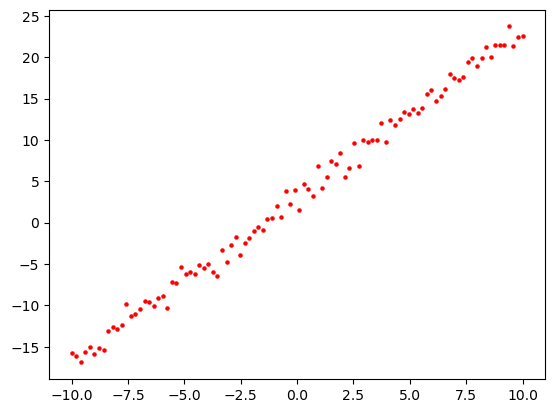

In [7]:
# plt.plot(X, Y_actual, c='k')
plt.scatter(X,Y_noisy, c='r', s=5)
plt.show()

In [8]:
A=np.arange(-10,10,0.1)
B=np.arange(-10, 10, 0.1)
A, B = np.meshgrid(A, B)


In [9]:
def calculate_mse(slope, intercp, X, Y):
  Y_predict=slope*X+intercp
  e=(Y-Y_predict)**2
  mse=np.mean(e)
  return mse

In [10]:
errors = np.zeros_like(A)  # Create an array with the same shape as the grids

for i in range(200):
    for j in range(200):
        errors[i, j] = calculate_mse(A[i, j], B[i, j], X, Y_noisy)
        # print(errors)
    #     break
    # break

### Error Surface Plot

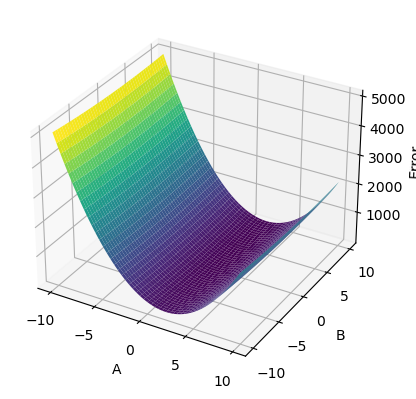

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, errors, cmap='viridis')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Error')
plt.show()

### Error Contour Plot

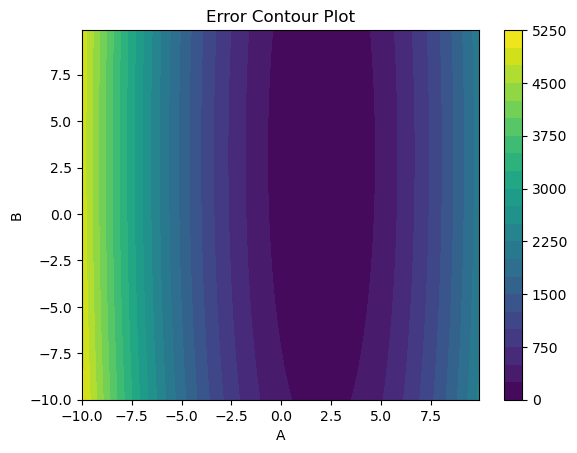

In [12]:
import matplotlib.pyplot as plt

plt.contourf(A, B, errors, levels=20, cmap='viridis')
plt.colorbar()
plt.xlabel('A')
plt.ylabel('B')
plt.title('Error Contour Plot')
plt.show()


### Error 3D contour Plot


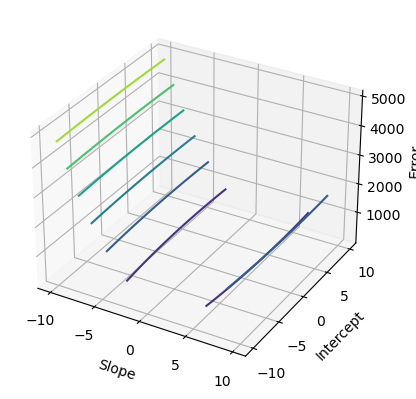

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour(A, B, errors, cmap='viridis')
ax.set_xlabel('Slope')
ax.set_ylabel('Intercept')
ax.set_zlabel('Error')
plt.show()


## Gradient descent
Gradient descent is an iterative optimization algorithm used to find the optimal coefficients that minimize the cost function of a linear regression model. It works by iteratively adjusting the coefficients in the direction of the steepest descent of the cost function.

The steps involved in gradient descent are as follows:

* Start with initial estimates for the coefficients.
* Calculate the cost function, which represents the error between the predicted and actual values.
* Compute the gradients of the cost function with respect to each coefficient.
Update the coefficients by taking a step in the opposite direction of the gradients.
* Repeat the process until convergence or a predefined stopping criterion is met.

Advantages of gradient descent:

* Suitable for large datasets as it can process one sample at a time or in batches.
* Can handle high-dimensional problems efficiently.
* Works well with non-linear regression models by using appropriate transformations or feature engineering.

Limitations of gradient descent:

* It may converge slowly, requiring a large number of iterations.
* The convergence to the global minimum is not guaranteed, and it may get stuck in local minima.
* Hyperparameters such as the learning rate need to be carefully tuned to ensure convergence and avoid overshooting or divergence.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
a=2
b=3
sigma=0.9
X=np.linspace(-10,10,100)
Y_actual=a*X+b
Y_noisy=a*X+b+sigma*np.random.normal(0,1, 100)

In [15]:
number_itr=100
lr=1e-2
#step1
a_hat=-10
b_hat=-10
m_array=[]
b_array=[]
error_array=[]
for i in range(number_itr):
  # step2
  y_predict=a_hat*X+b_hat
  e=(y_predict-Y_noisy)**2
  mse=np.mean(e)


  # step 3
  grad_a_hat=2*np.mean((y_predict-Y_noisy)*X)
  grad_b_hat=2*np.mean((y_predict-Y_noisy))
  # step 4
  a_hat=a_hat-lr*grad_a_hat
  b_hat=b_hat-lr*grad_b_hat

  # print(a_hat)
  print('error={}, a={}, b={}'.format(mse,a_hat,b_hat))
  m_array.append(a_hat)
  b_array.append(b_hat)
  error_array.append(mse)
  # break

error=5067.782654054425, a=-1.8386849946660657, b=-9.739050037540153
error=665.4236603796801, a=0.7718366400367072, b=-9.483319074329504
error=209.2167856695335, a=1.6068519777362478, b=-9.232702730383068
error=156.9848937896405, a=1.8739444258219595, b=-8.987098713315559
error=146.30522939156205, a=1.959378037162507, b=-8.746406776589401
error=140.08822278184164, a=1.9867052865812005, b=-8.510528678597767
error=134.53073119153828, a=1.9954463259575503, b=-8.279368142565966
error=129.2356047768438, a=1.9982422813136218, b=-8.0528308172548
error=124.15449206715212, a=1.999136610467921, b=-7.830824238449858
error=119.2750341018773, a=1.9994226753489257, b=-7.613257791221014
error=114.58884796442435, a=1.9995141775835905, b=-7.400042672936747
error=110.08823943205283, a=1.9995434459751498, b=-7.191091857018166
error=105.76585547168938, a=1.999552807918578, b=-6.986320057417956
error=101.614637964666, a=1.9995558024796072, b=-6.78564369380975
error=97.62780867588397, a=1.9995567603358286, 

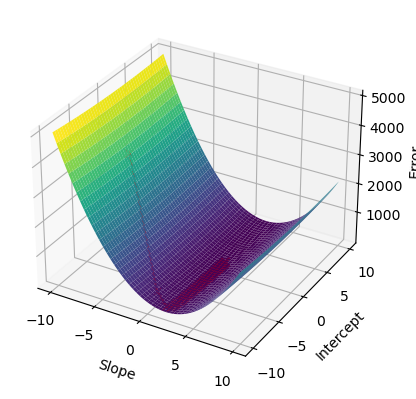

In [16]:
def calculate_mse(slope, intercept, x, y):
    predictions = slope * x + intercept
    mse = np.mean((predictions - y) ** 2)
    return mse
# Create grid for plotting
slope_values = np.arange(-10, 10, 0.1)
intercept_values = np.arange(-10, 10, 0.1)
slope_grid, intercept_grid = np.meshgrid(slope_values, intercept_values)

# Calculate error for each combination of slope and intercept
errors = np.zeros_like(slope_grid)
for i in range(200):
    for j in range(200):
        errors[i, j] = calculate_mse(slope_grid[i, j], intercept_grid[i, j], X, Y_noisy)

# Plot error surface with gradient flow
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(slope_grid, intercept_grid, errors, cmap='viridis')
# ax.plot_surface(A, B, errors, cmap='viridis')
ax.set_xlabel('Slope')
ax.set_ylabel('Intercept')
ax.set_zlabel('Error')
ax.plot(m_array, b_array, error_array, marker='x', color='r')  # Plot the final parameter values
plt.show()


## Exercise
Perform Linear Regression on Salary Vs years of experience
Data : https://www.kaggle.com/search?q=Years+of+experience+and+Salary+dataset

(a) Plot error surface

(b) Show Gradient flow

(c) Show predicted values given certain X on the scatter plot along with data

(d) Also Create animation to the convergence of the regression line


In [17]:
import pandas as pd
df=pd.read_csv('data/Salary_Data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Salary_Data.csv'

In [18]:

X=df['YearsExperience'].values
# X=X.reshape(30,1)
Y=df['Salary'].values
Y_noisy=Y

NameError: name 'df' is not defined

In [19]:
def calculate_mse(slope, intercp, X, Y):
  Y_predict=slope*X+intercp
  e=(Y-Y_predict)**2
  mse=np.mean(e)
  return mse

In [20]:
A=np.arange(1000,50000,1000)
B=np.arange(1000, 50000, 1000)
A, B = np.meshgrid(A, B)

In [21]:
errors = np.zeros_like(A)  # Create an array with the same shape as the grids

for i in range(A.shape[0]):
    for j in range(A.shape[0]):
        errors[i, j] = calculate_mse(A[i, j], B[i, j], X, Y_noisy)
        # print(errors)
    #     break
    # break

OverflowError: Python int too large to convert to C long

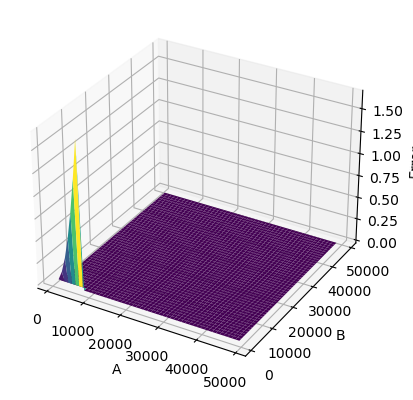

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, errors, cmap='viridis')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Error')
plt.show()

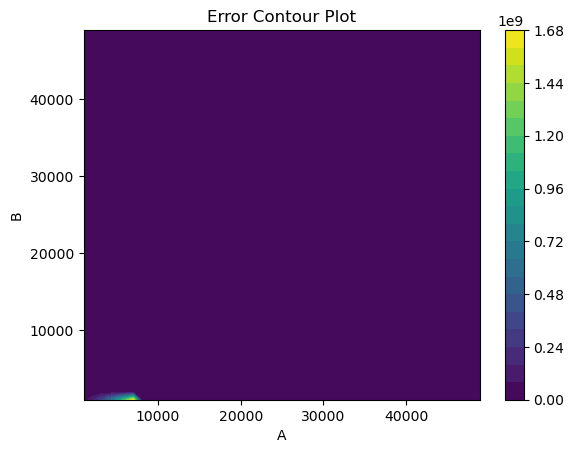

In [23]:
import matplotlib.pyplot as plt

plt.contourf(A, B, errors, levels=20, cmap='viridis')
plt.colorbar()
plt.xlabel('A')
plt.ylabel('B')
plt.title('Error Contour Plot')
plt.show()

In [24]:
number_itr=700
lr=1e-2
#step1
a_hat=10000
b_hat=30000
m_array=[]
b_array=[]
error_array=[]
error_p=0
# while True:
for i in range(number_itr):
  # step2
  y_predict=a_hat*X+b_hat
  e=(y_predict-Y_noisy)**2
  mse=np.mean(e)


  # step 3
  grad_a_hat=2*np.mean((y_predict-Y_noisy)*X)
  grad_b_hat=2*np.mean((y_predict-Y_noisy))
  # step 4
  a_hat=a_hat-lr*grad_a_hat
  b_hat=b_hat-lr*grad_b_hat

  # print(a_hat)
  print('error={}, a={}, b={}'.format(mse,a_hat,b_hat))
  m_array.append(a_hat)
  b_array.append(b_hat)
  error_array.append(mse)
  # print(error_p)
  # if error_p-mse>0.0001:
  #   break
  # else:
  #   error_p=mse


error=4299130728.773121, a=3200.0131668571858, b=29400.06094996246
error=1211981167.0859823, a=1024.9332033939959, b=28812.12068092567
error=865547115.321149, a=329.20055514819467, b=28235.939217269617
error=800736953.4720112, a=106.65980907630541, b=27671.281382886686
error=765903669.124765, a=35.47674215095364, b=27117.916705191412
error=735254245.1454984, a=12.707747679881571, b=26575.619321050042
error=706105473.6155708, a=5.424735980380251, b=26044.1678845915
error=678140350.8815653, a=3.0951531135364436, b=25523.34547686213
error=651285650.6800838, a=2.3500003446807445, b=25012.93951728735
error=625494703.9237719, a=2.1116518159221394, b=24512.74167690406
error=600725110.1018068, a=2.035412387531344, b=24022.54779332844
error=576936395.4122242, a=2.011026038382738, b=23542.15778742433
error=554089714.1534959, a=2.003225691012031, b=23071.3755816383
error=532147761.5062894, a=2.0007306304052412, b=22610.009019967994
error=511074710.18735784, a=1.9999325470461975, b=22157.869789531

In [25]:
Y_actual=a_hat*X+b_hat

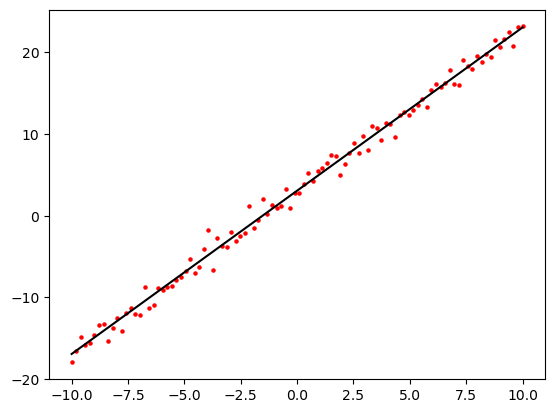

In [26]:
plt.plot(X, Y_actual, c='k')
plt.scatter(X,Y_noisy, c='r', s=5)
plt.show()

## Exercise
Find minima and maxima using Gradient descent for the following function.

$z=1.7 \times exp \left[ - \left\{  \frac{(x-3)^2}{10} + \frac{(y-3)^2}{10} \right\} \right] + exp \left[ - \left\{  \frac{(x+5)^2}{8} + \frac{(y+5)^2}{8} \right\} \right] + 2 \times exp \left[ - \left\{  \frac{(x)^2}{4} + \frac{(y)^2}{5} \right\} \right] + 1.5 \times  exp \left[ - \left\{  \frac{(x-4)^2}{18} + \frac{(y+4)^2}{16} \right\} \right] + 1.2 \times  exp \left[ - \left\{  \frac{(x+4)^2}{18} + \frac{(y-4)^2}{16} \right\} \right]$

Display the surface plot and contour plot of the above function in the
search space given by $S_{min} = [x_{min}, y_{min}]^T = [−10, −10]^T$ and $S_{max} = [x_{max}, y_{max}]^T = [10, 10]^T$
